In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from requests_html import HTMLSession

# Function to scrape job data
def scrape_jobs(url):
    session = HTMLSession()

    # Send a GET request and render JavaScript content
    response = session.get(url)
    response.html.render()

    # Create a BeautifulSoup object
    soup = BeautifulSoup(response.html.html, 'html.parser')

    # Find job listings
    job_listings = soup.find_all('li', class_='result-card')

    # Initialize lists to store data
    job_data = []

    # Loop through job listings and extract data
    for job_listing in job_listings:
        job_title = job_listing.find('h3', class_='result-card__title').get_text(strip=True)
        company_name = job_listing.find('h4', class_='result-card__subtitle').get_text(strip=True)
        location = job_listing.find('span', class_='job-result-card__location').get_text(strip=True)
        posted_date = job_listing.find('time')['datetime']
        job_description = job_listing.find('p', class_='job-result-card__snippet').get_text(strip=True)
        skills = [skill.get_text(strip=True) for skill in job_listing.find_all('li', class_='job-criteria__item')]

        job_data.append({
            'Job Title': job_title,
            'Company Name': company_name,
            'Location': location,
            'Posted Date': posted_date,
            'Job Description': job_description,
            'Skills': skills
        })

    session.close()
    return job_data

# Set the base URL for the LinkedIn job search page
base_url = 'https://ca.linkedin.com/jobs/search'

# Specify job titles and their keywords
job_titles = ['Data Analyst', 'Full Stack Developer', 'Python Developer']
keyword_map = {
    'Data Analyst': 'Data%20Analyst',
    'Full Stack Developer': 'Full%20Stack%20Developer',
    'Python Developer': 'Python%20Developer'
}

# Initialize a list to store all job data
all_job_data = []

# Scrape job data for specified job titles
for job_title in job_titles:
    keyword = keyword_map[job_title]
    url = f'{base_url}?keywords={keyword}&location=Canada&geoId=101174742&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0'
    job_data = scrape_jobs(url)
    all_job_data.extend(job_data)

# Create a Pandas DataFrame
df = pd.DataFrame(all_job_data)

# Summarize skills required for each job title
skills_summary = df.groupby('Job Title')['Skills'].sum().apply(pd.Series).stack().value_counts()

# Display the summarized skills
print("Skills Summary:")
print(skills_summary)

# Save the DataFrame to a CSV file
df.to_csv('linkedin_jobs_data.csv', index=False)

# df = pd.read_csv('linkedin_jobs_data.csv')

# Print the first few rows of the DataFrame for reference
print("Sample Job Data:")
print(df.head())

# Summarize skills required for each job title
skills_summary = df.groupby('Job Title')['Skills'].sum().apply(pd.Series).stack().value_counts()

# Display the summarized skills
print("\nSkills Summary:")
print(skills_summary)

# Create a bar plot to visualize the top skills
top_skills = skills_summary.head(10)  # You can adjust the number of top skills to display
plt.figure(figsize=(10, 6))
top_skills.plot(kind='bar')
plt.title('Top Skills Required for Different Job Titles')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

RuntimeError: Cannot use HTMLSession within an existing event loop. Use AsyncHTMLSession instead.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import asyncio
import nest_asyncio
from bs4 import BeautifulSoup
from requests_html import AsyncHTMLSession

# Allow nested event loops
nest_asyncio.apply()

# Async function to scrape job data
async def scrape_jobs(url):
    session = AsyncHTMLSession()

    # Send a GET request and render JavaScript content
    response = await session.get(url)
    await response.html.arender()

    # Create a BeautifulSoup object
    soup = BeautifulSoup(response.html.html, 'html.parser')

    # Find job listings
    job_listings = soup.find_all('li', class_='result-card')

    # Initialize lists to store data
    job_data = []

    # Loop through job listings and extract data
    for job_listing in job_listings:
        # ... Extract job data using BeautifulSoup ...
        job_data.append({
            'Job Title': job_title,
            'Company Name': company_name,
            'Location': location,
            'Posted Date': posted_date,
            'Job Description': job_description,
            'Skills': skills
        })

    session.close()
    return job_data
    
# Set the base URL for the LinkedIn job search page
base_url = 'https://ca.linkedin.com/jobs/search'

# Specify job titles and their keywords
job_titles = ['Data Analyst', 'Full Stack Developer', 'Python Developer']
keyword_map = {
    'Data Analyst': 'Data%20Analyst',
    'Full Stack Developer': 'Full%20Stack%20Developer',
    'Python Developer': 'Python%20Developer'
}

# Initialize a list to store all job data
all_job_data = []

# Use asyncio to run the asynchronous scraping function
loop = asyncio.get_event_loop()

# Scrape job data for specified job titles
for job_title in job_titles:
    keyword = keyword_map[job_title]
    url = f'{base_url}?keywords={keyword}&location=Canada&geoId=101174742&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0'
    job_data = loop.run_until_complete(scrape_jobs(url))
    all_job_data.extend(job_data)

# Create a Pandas DataFrame
df = pd.DataFrame(all_job_data)

# Summarize skills required for each job title
skills_summary = df.groupby('Job Title')['Skills'].sum().apply(pd.Series).stack().value_counts()

# Display the summarized skills
print("Skills Summary:")
print(skills_summary)

# Create a bar plot to visualize the top skills
top_skills = skills_summary.head(10)  # You can adjust the number of top skills to display
plt.figure(figsize=(10, 6))
top_skills.plot(kind='bar')
plt.title('Top Skills Required for Different Job Titles')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\abc\AppData\Local\Temp\ipykernel_10484\1229376803.py:40: RuntimeWarning: coroutine 'AsyncHTMLSession.close' was never awaited
  session.close()


KeyError: 'Job Title'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import asyncio
import nest_asyncio
from bs4 import BeautifulSoup
from requests_html import AsyncHTMLSession

# Allow nested event loops
nest_asyncio.apply()

# Async function to scrape job data
async def scrape_jobs(url):
    session = AsyncHTMLSession()

    # Send a GET request and render JavaScript content
    response = await session.get(url)
    await response.html.arender()

    # Create a BeautifulSoup object
    soup = BeautifulSoup(response.html.html, 'html.parser')

    # Find job listings
    job_listings = soup.find_all('li', class_='result-card')

    # Initialize lists to store data
    job_data = []

    # Loop through job listings and extract data
    for job_listing in job_listings:
        # ... Extract job data using BeautifulSoup ...
        job_data.append({
            'Job Title': job_title,
            'Company Name': company_name,
            'Location': location,
            'Posted Date': posted_date,
            'Job Description': job_description,
            'Skills': skills
        })

    session.close()
    return job_data

# Set the base URL for the LinkedIn job search page
base_url = 'https://ca.linkedin.com/jobs/search'

# Specify job titles and their keywords
job_titles = ['Data Analyst', 'Full Stack Developer', 'Python Developer']
keyword_map = {
    'Data Analyst': 'Data%20Analyst',
    'Full Stack Developer': 'Full%20Stack%20Developer',
    'Python Developer': 'Python%20Developer'
}

# Initialize a list to store all job data
all_job_data = []

# Use asyncio to run the asynchronous scraping function
loop = asyncio.get_event_loop()

# Scrape job data for specified job titles
for job_title in job_titles:
    keyword = keyword_map[job_title]
    url = f'{base_url}?keywords={keyword}&location=Canada&geoId=101174742&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0'
    job_data = loop.run_until_complete(scrape_jobs(url))
    all_job_data.extend(job_data)

# Create a Pandas DataFrame
df = pd.DataFrame(all_job_data)

# Summarize skills required for each job title
skills_summary = df.groupby('Job Title')['Skills'].sum().apply(pd.Series).stack().value_counts()

# Display the summarized skills
print("Skills Summary:")
print(skills_summary)

# Create a bar plot to visualize the top skills
top_skills = skills_summary.head(10)  # You can adjust the number of top skills to display
plt.figure(figsize=(10, 6))
top_skills.plot(kind='bar')
plt.title('Top Skills Required for Different Job Titles')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Python311\Lib\site-packages\pyppeteer\util.py:29: RuntimeWarning: coroutine 'scrape_jobs' was never awaited
  gc.collect()
C:\Users\abc\AppData\Local\Temp\ipykernel_10484\816045740.py:40: RuntimeWarning: coroutine 'AsyncHTMLSession.close' was never awaited
  session.close()


KeyError: 'Job Title'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import asyncio
import nest_asyncio
from bs4 import BeautifulSoup
from requests_html import AsyncHTMLSession

# Allow nested event loops
nest_asyncio.apply()

# Async function to scrape job data
async def scrape_jobs(url):
    session = AsyncHTMLSession()

    # Send a GET request and render JavaScript content
    response = await session.get(url)
    await response.html.arender()

    # Create a BeautifulSoup object
    soup = BeautifulSoup(response.html.html, 'html.parser')

    # Find job listings
    job_listings = soup.find_all('li', class_='result-card')

    # Initialize lists to store data
    job_data = []

    # Loop through job listings and extract data
    for job_listing in job_listings:
        job_title_elem = job_listing.find('h3', class_='result-card__title')
        company_name_elem = job_listing.find('h4', class_='result-card__subtitle')
        location_elem = job_listing.find('span', class_='job-result-card__location')
        posted_date_elem = job_listing.find('time')
        job_description_elem = job_listing.find('p', class_='job-result-card__snippet')
        skill_elements = job_listing.find_all('span', class_='job-criteria__text')

        if job_title_elem and company_name_elem and location_elem and posted_date_elem and job_description_elem and skill_elements:
            job_title = job_title_elem.get_text(strip=True)
            company_name = company_name_elem.get_text(strip=True)
            location = location_elem.get_text(strip=True)
            posted_date = posted_date_elem['datetime']
            job_description = job_description_elem.get_text(strip=True)
            skills = [skill_elem.get_text(strip=True) for skill_elem in skill_elements]

            job_data.append({
                'Job Title': job_title,
                'Company Name': company_name,
                'Location': location,
                'Posted Date': posted_date,
                'Job Description': job_description,
                'Skills': skills
            })

    await session.close()
    return job_data

# Set the base URL for the LinkedIn job search page
base_url = 'https://ca.linkedin.com/jobs/search'

# Specify job titles and their keywords
job_titles = ['Data Analyst', 'Full Stack Developer', 'Python Developer']
keyword_map = {
    'Data Analyst': 'Data%20Analyst',
    'Full Stack Developer': 'Full%20Stack%20Developer',
    'Python Developer': 'Python%20Developer'
}

# Initialize a list to store all job data
all_job_data = []

# Use asyncio to run the asynchronous scraping function
loop = asyncio.get_event_loop()

# Scrape job data for specified job titles
for job_title in job_titles:
    keyword = keyword_map[job_title]
    url = f'{base_url}?keywords={keyword}&location=Canada&geoId=101174742&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0'
    job_data = loop.run_until_complete(scrape_jobs(url))
    all_job_data.extend(job_data)

# Create a Pandas DataFrame
df = pd.DataFrame(all_job_data)

# Summarize skills required for each job title
skills_summary = df.groupby('Job Title')['Skills'].sum().apply(pd.Series).stack().value_counts()

# Display the summarized skills
print("Skills Summary:")
print(skills_summary)

# Create a bar plot to visualize the top skills
top_skills = skills_summary.head(10)  # You can adjust the number of top skills to display
plt.figure(figsize=(10, 6))
top_skills.plot(kind='bar')
plt.title('Top Skills Required for Different Job Titles')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Job Title'

In [6]:
import asyncio
import nest_asyncio
from bs4 import BeautifulSoup
from requests_html import AsyncHTMLSession
import pandas as pd
import matplotlib.pyplot as plt

# Allow nested event loops
nest_asyncio.apply()

# Async function to scrape job data
async def scrape_jobs(url):
    session = AsyncHTMLSession()

    # Send a GET request and render JavaScript content
    response = await session.get(url)
    await response.html.arender()

    # Create a BeautifulSoup object
    soup = BeautifulSoup(response.html.html, 'html.parser')

    # Find job listings
    job_listings = soup.find_all('li', class_='result-card')

    # Initialize lists to store data
    job_data = []

    # Loop through job listings and extract data
    for job_listing in job_listings:
        job_title_elem = job_listing.find('h3', class_='result-card__title')
        company_name_elem = job_listing.find('h4', class_='result-card__subtitle')
        location_elem = job_listing.find('span', class_='job-result-card__location')
        posted_date_elem = job_listing.find('time')
        job_description_elem = job_listing.find('p', class_='job-result-card__snippet')
        skill_elements = job_listing.find_all('span', class_='job-criteria__text')

        if job_title_elem and company_name_elem and location_elem and posted_date_elem and job_description_elem and skill_elements:
            job_title = job_title_elem.get_text(strip=True)
            company_name = company_name_elem.get_text(strip=True)
            location = location_elem.get_text(strip=True)
            posted_date = posted_date_elem['datetime']
            job_description = job_description_elem.get_text(strip=True)
            skills = [skill_elem.get_text(strip=True) for skill_elem in skill_elements]

            job_data.append({
                'Job Title': job_title,
                'Company Name': company_name,
                'Location': location,
                'Posted Date': posted_date,
                'Job Description': job_description,
                'Skills': skills
            })

    await session.close()
    return job_data

# Set the base URL for the LinkedIn job search page
base_url = 'https://ca.linkedin.com/jobs/search'

# Specify job titles and their keywords
job_titles = ['Data Analyst', 'Full Stack Developer', 'Python Developer']
keyword_map = {
    'Data Analyst': 'Data%20Analyst',
    'Full Stack Developer': 'Full%20Stack%20Developer',
    'Python Developer': 'Python%20Developer'
}

# Initialize a list to store all job data
all_job_data = []

# Use asyncio to run the asynchronous scraping function
loop = asyncio.get_event_loop()

# Scrape job data for specified job titles
for job_title in job_titles:
    keyword = keyword_map[job_title]
    url = f'{base_url}?keywords={keyword}&location=Canada&geoId=101174742&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0'
    job_data = loop.run_until_complete(scrape_jobs(url))
    all_job_data.extend(job_data)

# Create a Pandas DataFrame
df = pd.DataFrame(all_job_data)

print(df)

# Summarize skills required for each job title
# skills_summary = df.groupby('Job Title')['Skills'].sum().apply(pd.Series).stack().value_counts()

# # Display the summarized skills
# print("Skills Summary:")
# print(skills_summary)

# # Create a bar plot to visualize the top skills
# top_skills = skills_summary.head(10)  # You can adjust the number of top skills to display
# plt.figure(figsize=(10, 6))
# top_skills.plot(kind='bar')
# plt.title('Top Skills Required for Different Job Titles')
# plt.xlabel('Skill')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


Empty DataFrame
Columns: []
Index: []


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import asyncio
import nest_asyncio
from bs4 import BeautifulSoup
from requests_html import AsyncHTMLSession

# Allow nested event loops
nest_asyncio.apply()

# Async function to scrape job data
async def scrape_jobs(url):
    session = AsyncHTMLSession()

    # Send a GET request and render JavaScript content
    response = await session.get(url)
    await response.html.arender()

    # Create a BeautifulSoup object
    soup = BeautifulSoup(response.html.html, 'html.parser')

    # Find job listings
    job_listings = soup.find_all('li', class_='result-card')

    # Initialize lists to store data
    job_data = []

    # Loop through job listings and extract data
    for job_listing in job_listings:
        job_title_elem = job_listing.find('h3', class_='result-card__title')
        company_name_elem = job_listing.find('h4', class_='result-card__subtitle')
        location_elem = job_listing.find('span', class_='job-result-card__location')
        skills_elem = job_listing.find('div', class_='job-result-card__meta')

        if job_title_elem and company_name_elem and location_elem and skills_elem:
            job_title = job_title_elem.get_text(strip=True)
            company_name = company_name_elem.get_text(strip=True)
            location = location_elem.get_text(strip=True)
            skills = skills_elem.get_text(strip=True)

            job_data.append({
                'Job Title': job_title,
                'Company Name': company_name,
                'Location': location,
                'Skills': skills
            })

    await session.close()
    return job_data

# Set the base URL for the LinkedIn job search page
base_url = 'https://ca.linkedin.com/jobs/search?keywords=Data%20Analyst&location=Canada&geoId=&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0'

# Specify job titles and their keywords
job_titles = ['Data Analyst', 'Full Stack Developer', 'Python Developer']
keyword_map = {
    'Data Analyst': 'Data%20Analyst',
    'Full Stack Developer': 'Full%20Stack%20Developer',
    'Python Developer': 'Python%20Developer'
}

# Initialize a list to store all job data
all_job_data = []

# Use asyncio to run the asynchronous scraping function
loop = asyncio.get_event_loop()

# Scrape job data for specified job titles
for job_title in job_titles:
    keyword = keyword_map[job_title]
    url = f'{base_url}?keywords={keyword}&location=Canada&geoId=&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0'
    job_data = loop.run_until_complete(scrape_jobs(url))
    all_job_data.extend(job_data)

# Create a Pandas DataFrame
df = pd.DataFrame(all_job_data)

df

# Summarize skills required for each job title
skills_summary = df.groupby('Job Title')['Skills'].sum()

# Display the summarized skills
print("Skills Summary:")
print(skills_summary)

# Create a bar plot to visualize the skills
plt.figure(figsize=(10, 6))
skills_summary.plot(kind='bar')
plt.title('Skills Required for Different Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Skills')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Job Title'

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import asyncio
import nest_asyncio
from bs4 import BeautifulSoup
from requests_html import AsyncHTMLSession

# Allow nested event loops
nest_asyncio.apply()

async def scrape_jobs(url):
    session = AsyncHTMLSession()

    # Send a GET request and render JavaScript content
    response = await session.get(url)
    await response.html.arender()

    # Create a BeautifulSoup object
    soup = BeautifulSoup(response.html.html, 'html.parser')

    # Find job listings
    job_listings = soup.find_all('li', class_='result-card')

    # Initialize lists to store data
    job_data = []

    # Loop through job listings and extract data
    for job_listing in job_listings:
        job_title_elem = job_listing.find('h3', class_='result-card__title')
        company_name_elem = job_listing.find('h4', class_='result-card__subtitle')
        skills_elem = job_listing.find_all('span', class_='job-criteria__text')

        if job_title_elem and company_name_elem and skills_elem:
            job_title = job_title_elem.get_text(strip=True)
            company_name = company_name_elem.get_text(strip=True)
            skills = [skill.get_text(strip=True) for skill in skills_elem]

            job_data.append({
                'Job Title': job_title,
                'Company Name': company_name,
                'Skills': skills
            })

    await session.close()
    return job_data

# URL of the LinkedIn job search page
url = "https://ca.linkedin.com/jobs/search?keywords=Data%20Analyst&location=Canada&geoId=&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0"

# Use asyncio to run the asynchronous scraping function
loop = asyncio.get_event_loop()
job_data = loop.run_until_complete(scrape_jobs(url))

# Create a Pandas DataFrame
df = pd.DataFrame(job_data)

print(df)
# # Create a list of all skills
# all_skills = [skill for skills_list in df['Skills'] for skill in skills_list]

# # Create a frequency distribution of skills
# skill_counts = pd.Series(all_skills).value_counts()

# # Plot the top skills
# top_skills = skill_counts.head(10)
# plt.figure(figsize=(10, 6))
# top_skills.plot(kind='bar')
# plt.title('Top Skills Required for Data Analyst Jobs')
# plt.xlabel('Skill')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# print("Skills Summary:")
# print(top_skills)



NetworkError: Execution context was destroyed, most likely because of a navigation.

C:\Users\abc\AppData\Local\Temp\ipykernel_10484\3069414964.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  skills_counts = pd.Series(skills_list).value_counts()


Skills Summary:
Series([], dtype: int64)


IndexError: index 0 is out of bounds for axis 0 with size 0

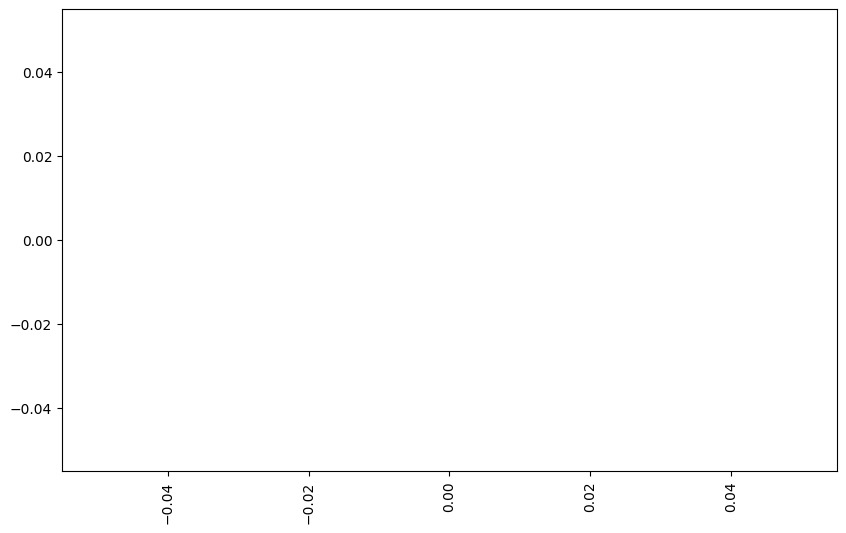

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

# URL of the LinkedIn job search page
url = "https://ca.linkedin.com/jobs/search?keywords=Data%20Analyst&location=Canada&geoId=&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0"

# Send a GET request
response = requests.get(url)

# Create a BeautifulSoup object
soup = BeautifulSoup(response.content, 'html.parser')

# Find job listings
listings = soup.find_all('li', class_='result-card')

# Initialize a list to store skills
skills_list = []

# Extract job skills
for listing in listings:
    skills = listing.find_all('span', class_='job-criteria__text')
    skills = [skill.get_text(strip=True) for skill in skills]
    skills_list.extend(skills)

# Create a frequency distribution of skills
skills_counts = pd.Series(skills_list).value_counts()

# Display the summarized skills
print("Skills Summary:")
print(skills_counts)

# Create a bar plot to visualize the top skills
top_skills = skills_counts.head(10)
plt.figure(figsize=(10, 6))
top_skills.plot(kind='bar')
plt.title('Top Skills Required for Data Analyst Jobs')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
